## importing necessary module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

## loading the data

In [2]:
(trainX , trainY),(testX, testY) = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("The shape of train dataset : ",trainX.shape)
print("The shape of train dataset : ",trainY.shape)
print("The shape of test dataset : ",testX.shape)
print("The shape of test dataset : ",testY.shape)


The shape of train dataset :  (60000, 28, 28)
The shape of train dataset :  (60000,)
The shape of test dataset :  (10000, 28, 28)
The shape of test dataset :  (10000,)


In [4]:
def display_image(img_set,title_set, title = None):
  plt.figure(figsize=(6,6)).suptitle(title , fontsize =16)
  n= len(title_set)
  for i in range (n):
    plt.subplot(3,3,i+1)
    plt.imshow(img_set[i],cmap = 'gray')
    plt.title(title_set[i])
  plt.show()
  plt.close()

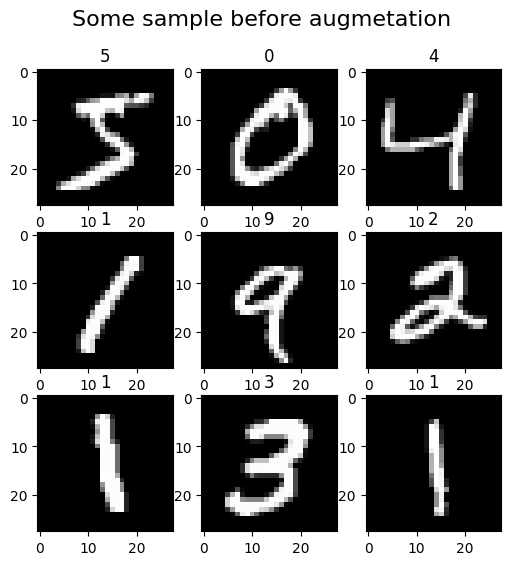

In [5]:
display_image(trainX[:9],trainY[:9],title = "Some sample before augmetation")

## adding an extra dimension and one hot encoding

In [6]:
#if len(trainX.shape) == 3:
trainX = np.expand_dims(trainX, axis = -1)


#if len(testX.shape) == 3:
testX = np.expand_dims(testX, axis = -1)


print('trainX.shape :{}, testX.shape :{}'.format(trainX.shape,testX.shape))

trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes= 10)

print(f'trainY shape : {trainY.shape} ,testY shape : {testY.shape}')

# for row in trainY[:5]:
#     print(row)


trainX.shape :(60000, 28, 28, 1), testX.shape :(10000, 28, 28, 1)
trainY shape : (60000, 10) ,testY shape : (10000, 10)


## plotting the data set

In [7]:
# trainX_size = trainX.shape[0]
# valX_size = valX.shape[0]
# testX_size = testX.shape[0]


# # Labels for the bar chart
# labels = ['trainX', 'valX', 'testX']

# # Sizes corresponding to the labels
# sizes = [trainX_size, valX_size, testX_size]

# # Create the bar chart
# plt.figure(figsize=(10, 6))
# plt.bar(labels, sizes, color=['blue', 'orange', 'green'])
# plt.title('Data Split: Training, Validation, and Test Sets')
# plt.ylabel('Number of Samples')
# plt.xlabel('Datasets')

# plt.show()

## augmentation function

In [8]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,

    brightness_range = [0.8,1.2],
    fill_mode ='nearest',
    rescale = 1./255

)

## preparing dataset for augmentation

In [9]:
augmented_x_train = []
augmented_y_train = []

for i in range(len(trainX)):
  augmentex_image = datagen.flow(trainX[i:i+1],trainY[i:i+1],batch_size = 1)
  for _ in range(4):
    augmented_image , augmented_lebel = augmentex_image.__next__()
    augmented_x_train.append(augmented_image[0])
    augmented_y_train.append(augmented_lebel[0])

augmented_x_train = np.array(augmented_x_train)
augmented_y_train = np.array(augmented_y_train)


augmented_x_test = []
augmented_y_test = []

for i in range (len(testX)):
  augmentex_image = datagen.flow(testX[i:i+1],testY[i:i+1],batch_size= 1)
  for _ in range(4):
    augmented_image, augmented_lebel = augmentex_image.__next__()
    augmented_x_test.append(augmented_image[0])
    augmented_y_test.append(augmented_lebel[0])

augmented_x_test = np.array(augmented_x_test)
augmented_y_test = np.array(augmented_y_test)

## showing augmented images

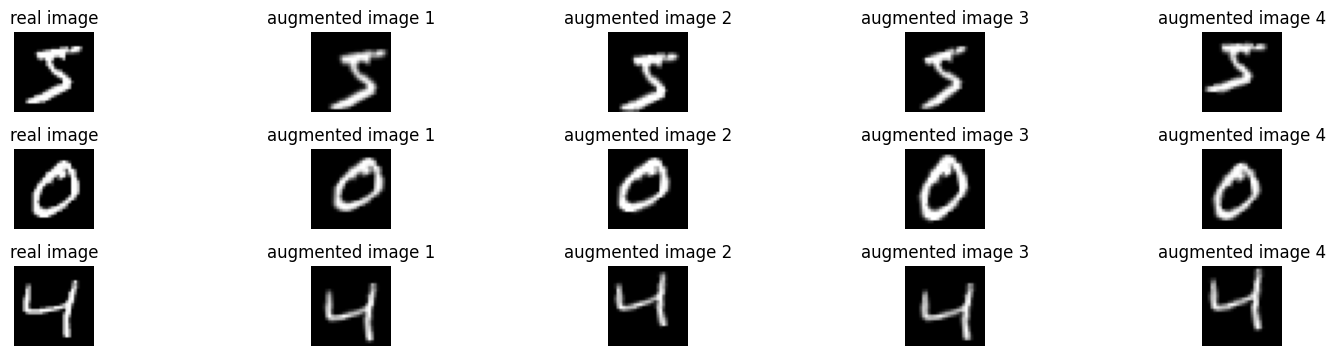

In [10]:
plt.figure(figsize = (15,6))

for i in range(3):
  plt.subplot(5,5,i*5 +1 )
  plt.imshow(trainX[i], cmap = 'gray')
  plt.title('real image')
  plt.axis('off')

  for j in range(4):
    plt.subplot(5,5,i*5+j+2)
    plt.imshow(augmented_x_train[i*4 + j],cmap ='gray')
    plt.title("augmented image "+str(j+1))
    plt.axis("off")

plt.tight_layout()
plt.show()



##shuffling the augmented images

In [11]:
indices = np.arange(len(augmented_x_train))
np.random.shuffle(indices)
augmented_x_train = augmented_x_train[indices]
augmented_y_train = augmented_y_train[indices]

indices = np.arange(len(augmented_x_test))
np.random.shuffle(indices)
augmented_x_test = augmented_x_test[indices]
augmented_y_test = augmented_y_test[indices]

## creating the first model by using the guidelines

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,Input,Dense,Activation,Flatten

In [13]:
inputs = Input(shape=(28,28,1), name = 'Input_layer')

x = Conv2D(filters =32 ,kernel_size=(3,3),strides =(1,1),padding='same',activation = 'relu')(inputs)
x = MaxPooling2D()(x)
x = Conv2D(filters =64,kernel_size=(3,3),strides =(1,1),padding='same',activation = 'relu')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(64 ,activation = 'relu')(x)
outputs = Dense(10,activation ='softmax',name = 'output_layer')(x)

model1 = Model(inputs,outputs,name = "Model_1")
model1.summary()



Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.utils import plot_model

In [15]:
#plot_model(model1,to_file = 'model_plot.png',show_shapes=True,show_layer_names=True)

## creating second model

In [16]:
inputs = Input(shape=(28,28,1), name = 'Input_layer')

x = Conv2D(filters =32 ,kernel_size=(3,3),strides =(1,1),padding='same',activation = 'relu')(inputs)
x = MaxPooling2D()(x)
x = Conv2D(filters =64,kernel_size=(3,3),strides =(1,1),padding='same',activation = 'relu')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(64 ,activation = 'relu')(x)
outputs = Dense(10,activation ='softmax',name = 'output_layer')(x)

model2 = Model(inputs,outputs,name = "Model_2")
model2.summary()

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

## training of model 1 with normal dataset

In [17]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [18]:
print(trainY.shape)


(60000, 10)


In [19]:
trainY = np.squeeze(trainY)


In [20]:
history = model1.fit(trainX,trainY,batch_size = 32, validation_split= 0.1,epochs = 10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8868 - loss: 1.0021 - val_accuracy: 0.9813 - val_loss: 0.0616
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9812 - loss: 0.0609 - val_accuracy: 0.9852 - val_loss: 0.0586
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9855 - loss: 0.0436 - val_accuracy: 0.9852 - val_loss: 0.0548
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9886 - loss: 0.0365 - val_accuracy: 0.9858 - val_loss: 0.0522
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9877 - val_loss: 0.0515
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9924 - loss: 0.0234 - val_accuracy: 0.9878 - val_loss: 0.0604
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0231 - val_accuracy: 0.9872 - val_loss: 0.0602
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9953 - loss: 0.0165 -

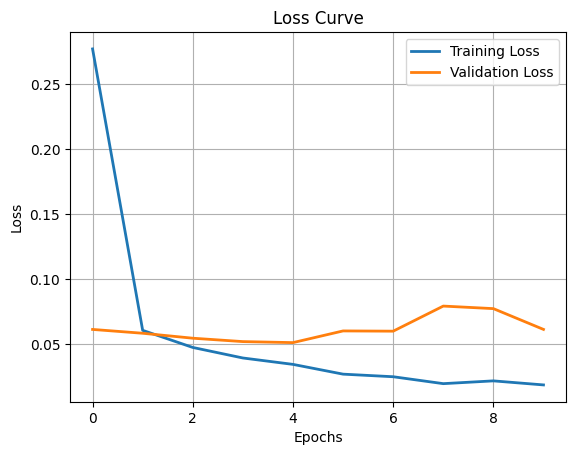

In [21]:
# Loss curve
plt.plot(history.history['loss'],linewidth=2, label='Training Loss')
plt.plot(history.history['val_loss'],linewidth=2, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

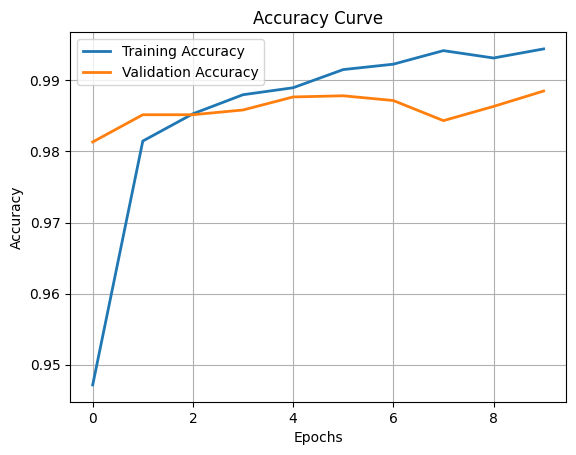

In [22]:
# Accuracy curve
plt.plot(history.history['accuracy'], linewidth=2, label='Training Accuracy')
plt.plot(history.history['val_accuracy'], linewidth=2, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Adjust layout and display the plot
plt.show()

In [23]:
scores = model1.evaluate(testX,testY)
print("test accuracy of model1 for actual data is : ",scores[1]*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9844 - loss: 0.0695
test accuracy of model1 for actual data is :  98.8099992275238


## checking model 2

In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model2.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics =['accuracy']
)

In [25]:
history_aug = model2.fit(augmented_x_train,augmented_y_train,batch_size= 32, validation_split= 0.1, epochs = 10)

Epoch 1/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9125 - loss: 0.2753 - val_accuracy: 0.9814 - val_loss: 0.0611
Epoch 2/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9849 - loss: 0.0472 - val_accuracy: 0.9856 - val_loss: 0.0450
Epoch 3/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9910 - loss: 0.0279 - val_accuracy: 0.9896 - val_loss: 0.0327
Epoch 4/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9934 - loss: 0.0201 - val_accuracy: 0.9889 - val_loss: 0.0334
Epoch 5/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9951 - loss: 0.0155 - val_accuracy: 0.9889 - val_loss: 0.0384
Epoch 6/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9958 - loss: 0.0120 - val_accuracy: 0.9909 - val_loss: 0.0335
Epoch 7/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9968 - loss: 0.0098 - val_accuracy: 0.9907 - val_loss: 0.0341
Epoch 8/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9970 - loss: 0

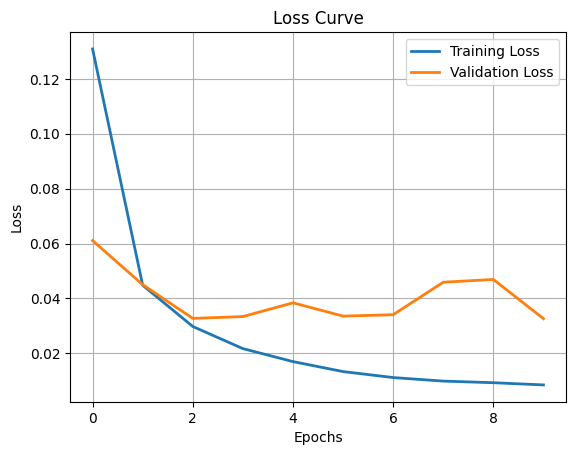

In [26]:
# Loss curve
plt.plot(history_aug.history['loss'],linewidth=2, label='Training Loss')
plt.plot(history_aug.history['val_loss'],linewidth=2, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
scores = model2.evaluate(augmented_x_test,augmented_y_test)
print("accuracy on augmented data : ",scores[1]*100)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9895 - loss: 0.0444
accuracy on augmented data :  98.92249703407288


In [28]:
score = model2.evaluate(testX,testY)
print("accuracy on real data : ",score[1]*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9831 - loss: 21.1370
accuracy on real data :  98.5700011253357


In [29]:
print("aug x shape :",augmented_x_train.shape)

aug x shape : (240000, 28, 28, 1)
